In [2]:
import numpy as np
import pandas as pd

In [1]:
from sklearn.datasets import make_regression

In [3]:
from matplotlib import pyplot as plt

In [4]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

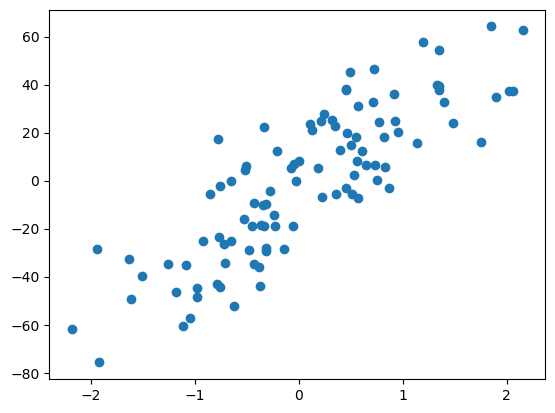

In [5]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [9]:
from sklearn.linear_model import Ridge
lf=Ridge(alpha=10)
lf.fit(X,y)
print(lf.coef_)
print(lf.intercept_)

[24.9546267]
-2.1269130035235726


In [10]:
r=Ridge(alpha=100)
r.fit(X,y)
print(r.coef_)
print(r.intercept_)


[12.93442104]
-1.4248441496033308


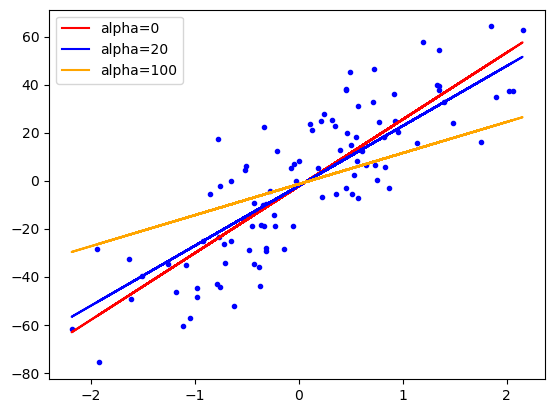

In [12]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,lf.predict(X),color='blue',label='alpha=20')
plt.plot(X,r.predict(X),color='orange',label='alpha=100')
plt.legend()

In [33]:
class myridge:
    def __init__(self,alpha):
        self.alpha=alpha
        self.m=None
        self.b=None
    def fit(self,x_train,y_train):
        nom=0
        
        den=0
        
        for i in range(x_train.shape[0]):
            nom=nom+((y_train[i]-y_train.mean())*(x_train[i]-x_train.mean()))
            den=den+((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))
            

        self.m=nom/(den+self.alpha)
        self.b=y_train.mean()-self.m*x_train.mean()
        print(self.m)
        print(self.b)

    def predict(self,x):
        y_pred=self.m*x+self.b
        return y_pred
        

In [34]:
rd=myridge(alpha=10)
rd.fit(X,y)

[24.9546267]
[-2.126913]


In [36]:
from sklearn.datasets import load_diabetes

In [37]:
X,y=load_diabetes(return_X_y=True)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [39]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.1,solver='cholesky')
reg.fit(x_train,y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'cholesky'
,positive,False
,random_state,None


In [41]:
y_pred=reg.predict(x_test)

In [43]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.46931288533098037


In [44]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [48]:
class play:
    def __init__(self,alpha):
        self.alpha=alpha
        self.coef=None
        self.intercept=None
    def fit(self,x_train,y_train):
        x_train=np.insert(x_train,0,1,axis=1)
        ide=np.identity(x_train.shape[1]) 
        result=np.linalg.inv(np.dot(x_train.T,x_train)+ide*self.alpha).dot(x_train.T).dot(y_train)
        self.intercept=result[0]
        self.coef=result[1:]
        print(self.coef)
        print(self.intercept)
    def predict(self,x_test):
        return self.intercept+np.dot(x_test,self.coef)

In [51]:
model=play(0.1)
model.fit(x_train,y_train)
print(r2_score(y_test,model.predict(x_test)))

[  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
150.84762720023167
0.46921361559931885
